In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno  ##pip install missingno


### **Read File**

In [2]:
null_df = pd.read_csv('Data/car_v2.csv')

### **Initial count of Rows and Column**

In [3]:
null_df.shape

(5551, 126)

### **Are there duplicate rows?**

In [4]:
null_df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5521    False
5522    False
5523    False
5524    False
5525    False
5526    False
5527    False
5528    False
5529    False
5530    False
5531    False
5532    False
5533    False
5534    False
5535    False
5536    False
5537    False
5538    False
5539    False
5540    False
5541    False
5542    False
5543    False
5544    False
5545    False
5546    False
5547    False
5548    False
5549    False
5550    False
Length: 5551, dtype: bool


### **Count of null at the Columns level **

### There are 127 rows and some rows with null values. Many of these null rows have a count of only nine nulls 

In [5]:
null_df.isnull().sum().count()

126

In [6]:
#null_df.isnull().sum()
null_df.isnull().sum().sort_values(ascending=False)

% Unprofitable Banks                5551
% Banks with Earnings Gains         5551
Trading Acct Gains Fees             3698
Earnings Cov Net Chargeoffs         2343
namehcr                             1251
Credit Loss Prov to Chargeoffs       691
Loan Loss Allow to noncurr Loans     578
Loss Allow to Loans                   46
Net Chargeoffs to Loans               45
Noncurrent Loans to Loans             37
Average Total Loans                   36
Net Loans Lease to core deposits      24
Assets per Emp                        21
Cash Div to Net Inc                   11
Average earning assets                10
Yield on Earning Assets               10
Cost of Funding Earnings Assets       10
Net Interest Margin                   10
Volatile Liabilities                   9
Derivatives                            9
Sale Conversion Ret Stock              9
Tier 2 Risk-based capital              9
Tier One Capital                       9
Loans Leases held for sale             9
FHLB advances   


### **More Analysis**



### Find a pattern: Are there several columns with null values at the same index rows?  

###  Retreive the row number for the solitary row which has "lnatres" as null

In [7]:
null_columns=null_df.columns[null_df.isnull().any()] 
# Step one - Assign null_columns

In [8]:
print(null_df[null_df["Number Employees"].isnull()][null_columns])  

# Step two - 
#Are there other columns with null value at the same index than sample column "Number Employees"
#The answer is Yes. It appears to ber several colums with nine null value at the same index as seen in the results below.

     namehcr  Number Employees  Cash Balance IB  Loan Allowance Loss  \
268      NaN               NaN              NaN                  NaN   
282      NaN               NaN              NaN                  NaN   
313      NaN               NaN              NaN                  NaN   
390      NaN               NaN              NaN                  NaN   
3127     NaN               NaN              NaN                  NaN   
3194     NaN               NaN              NaN                  NaN   
4175     NaN               NaN              NaN                  NaN   
4176     NaN               NaN              NaN                  NaN   
4380     NaN               NaN              NaN                  NaN   

      Bank Premises Fixed Assets  Other RE Owned  Goodwill Intangibles  \
268                          NaN             NaN                   NaN   
282                          NaN             NaN                   NaN   
313                          NaN             NaN         

### Removing null values at indexes = 268, 282, 313, 390, 3127, 3194, 4175, 4176, 4380?  

In [9]:
#Testing null value at index row= 282
null_df.loc[282]['Number Employees']

nan

In [10]:
null_df.shape

(5551, 126)

In [11]:
filtered_null_step1= null_df[null_df['Number Employees'].notnull()]

In [12]:
#filtered_null_step1.loc[282]['Number Employees']

In [13]:
filtered_null_step1.shape
# AS seenm, we removed a total of nine rows. Our dataset shape is now 5542 rowns (previously 5551 rows)

(5542, 126)

In [14]:
filtered_null_step1.isnull().sum().sort_values(ascending=False)

% Unprofitable Banks                  5542
% Banks with Earnings Gains           5542
Trading Acct Gains Fees               3689
Earnings Cov Net Chargeoffs           2334
namehcr                               1242
Credit Loss Prov to Chargeoffs         682
Loan Loss Allow to noncurr Loans       569
Noncurrent Loans to Loans               37
Loss Allow to Loans                     37
Net Chargeoffs to Loans                 36
Average Total Loans                     36
Net Loans Lease to core deposits        15
Assets per Emp                          12
Cash Div to Net Inc                      2
% Insured                                1
Average earning assets                   1
Net Loans Lease to Deposits              1
Net Interest Margin                      1
Cost of Funding Earnings Assets          1
Yield on Earning Assets                  1
Earning Assets                           0
Life Insurance Assets                    0
Subordinated Debt                        0
Adjusted Av

### Dropping Columns containing >80% of nulls

In [15]:
null_df = filtered_null_step1.columns[filtered_null_step1.isna().any()].tolist()

In [16]:
#List of columns containing nulls
null_df

['namehcr',
 '% Insured',
 '% Unprofitable Banks',
 '% Banks with Earnings Gains',
 'Yield on Earning Assets',
 'Cost of Funding Earnings Assets',
 'Net Interest Margin',
 'Net Chargeoffs to Loans',
 'Credit Loss Prov to Chargeoffs',
 'Earnings Cov Net Chargeoffs',
 'Assets per Emp',
 'Cash Div to Net Inc',
 'Loss Allow to Loans',
 'Loan Loss Allow to noncurr Loans',
 'Noncurrent Loans to Loans',
 'Net Loans Lease to Deposits',
 'Net Loans Lease to core deposits',
 'Average earning assets',
 'Average Total Loans',
 'Trading Acct Gains Fees']

### Dropping Columns containing >80% of nulls

In [17]:
#filtered_null_step2 = filtered_null_step1.dropna(thresh=500, axis=1)  #Keep only the rows with at least 500 non-na values

In [18]:
filtered_null_step2 = filtered_null_step1.dropna(thresh=0.8*len(filtered_null_step1), axis=1)

In [19]:
#filtered_null_step2 = filtered_null_step1.loc[:, filtered_null_step1.isnull().sum() < 0.8*filtered_null_step1.shape[0]]

In [20]:
filtered_null_step2.shape

(5542, 121)

In [21]:
filtered_null_step2.isnull().sum().sort_values(ascending=False)

Credit Loss Prov to Chargeoffs        682
Loan Loss Allow to noncurr Loans      569
Noncurrent Loans to Loans              37
Loss Allow to Loans                    37
Net Chargeoffs to Loans                36
Average Total Loans                    36
Net Loans Lease to core deposits       15
Assets per Emp                         12
Cash Div to Net Inc                     2
Yield on Earning Assets                 1
Cost of Funding Earnings Assets         1
Net Interest Margin                     1
Average earning assets                  1
% Insured                               1
Net Loans Lease to Deposits             1
Bank Equity                             0
All Other Liabilities                   0
Total Equity                            0
Subordinated Debt                       0
Net Operating Income                    0
Perpertual Pref Stock                   0
Other Borrowed Funds                    0
Surplus                                 0
Undivided Profits                 

In [31]:
null_df_1 = filtered_null_step2.columns[filtered_null_step2.isna().any()].tolist()

In [32]:
null_df_1

['% Insured',
 'Yield on Earning Assets',
 'Cost of Funding Earnings Assets',
 'Net Interest Margin',
 'Net Chargeoffs to Loans',
 'Credit Loss Prov to Chargeoffs',
 'Assets per Emp',
 'Cash Div to Net Inc',
 'Loss Allow to Loans',
 'Loan Loss Allow to noncurr Loans',
 'Noncurrent Loans to Loans',
 'Net Loans Lease to Deposits',
 'Net Loans Lease to core deposits',
 'Average earning assets',
 'Average Total Loans']

In [24]:
#msno.matrix(filtered_null_step2)

### Evualiting Columns containing nulls > 500

In [33]:
filtered_null_step2["Credit Loss Prov to Chargeoffs"].describe()

count      4860.000000
mean         49.740703
std        4265.386256
min     -117500.000000
25%           0.000000
50%          60.000000
75%         222.222222
max       80000.000000
Name: Credit Loss Prov to Chargeoffs, dtype: float64

In [34]:
filtered_null_step2["Loan Loss Allow to noncurr Loans"].describe()

count      4973.000000
mean       1062.504461
std        6091.322654
min           0.000000
25%          86.327260
50%         175.291375
75%         431.611111
max      140700.000000
Name: Loan Loss Allow to noncurr Loans, dtype: float64

In [27]:
#filtered_null_step3 = filtered_null_step2["Loan Loss Allow to noncurr Loans"].fillna(filtered_null_step2.mean())

In [42]:
df_3 = filtered_null_step2[['Loan Loss Allow to noncurr Loans', 'Credit Loss Prov to Chargeoffs']].fillna(filtered_null_step2.mean())]

SyntaxError: invalid syntax (<ipython-input-42-7266d86b55f9>, line 1)

In [29]:
#filtered_null_step3.isnull().sum().sort_values(ascending=False)

AttributeError: 'numpy.int64' object has no attribute 'sort_values'

In [ ]:
df=df.fillna(df.mean())

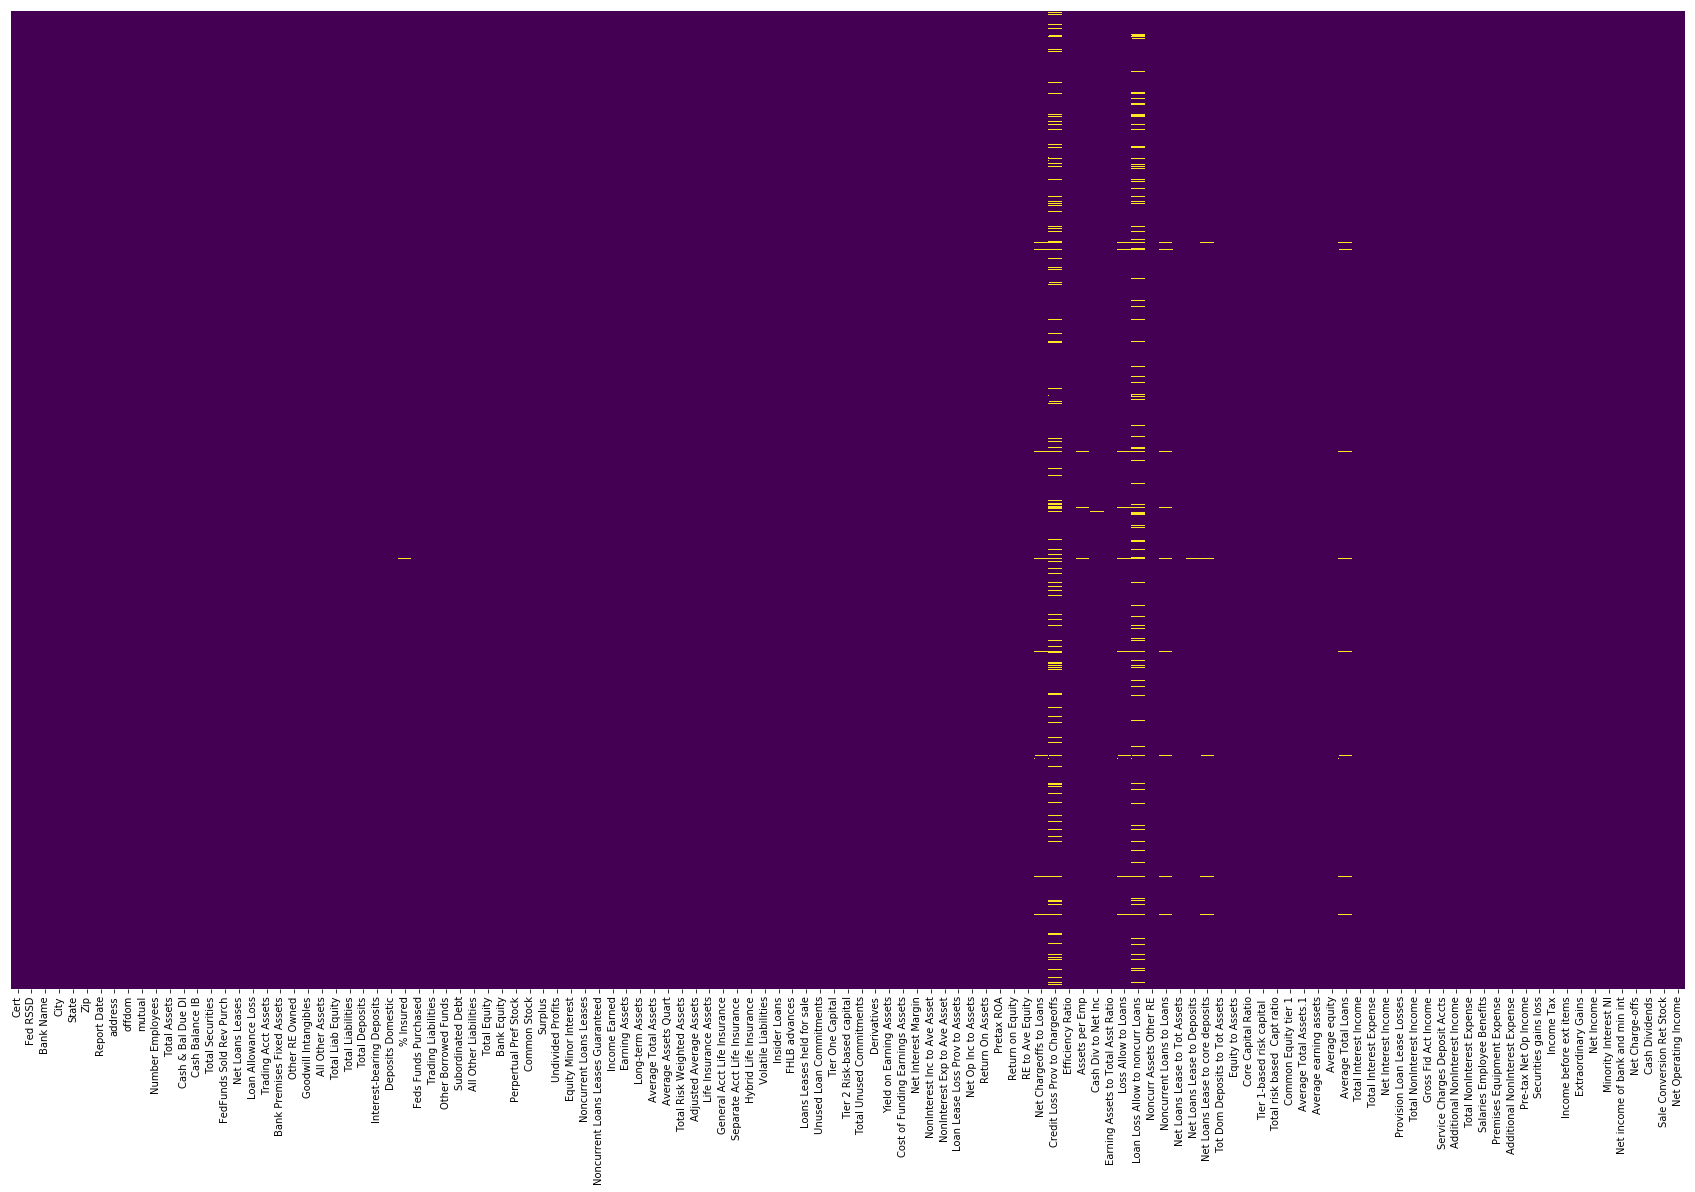

In [35]:
fig = plt.figure(figsize=(30,18))
sns.heatmap(filtered_null_step2.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [36]:
filtered_null_step2.shape
# As seen, we removed a total of five columns.

(5542, 121)

In [40]:
filtered_null_step2.isnull().sum().sort_values(ascending=False)
#filtered_null_step2 = filtered_null_step2.iloc[filtered_null_step2.isnull().sum(1).sort_values(ascending=0).index]

Credit Loss Prov to Chargeoffs        682
Loan Loss Allow to noncurr Loans      569
Noncurrent Loans to Loans              37
Loss Allow to Loans                    37
Net Chargeoffs to Loans                36
Average Total Loans                    36
Net Loans Lease to core deposits       15
Assets per Emp                         12
Cash Div to Net Inc                     2
Yield on Earning Assets                 1
Cost of Funding Earnings Assets         1
Net Interest Margin                     1
Average earning assets                  1
% Insured                               1
Net Loans Lease to Deposits             1
Bank Equity                             0
All Other Liabilities                   0
Total Equity                            0
Subordinated Debt                       0
Net Operating Income                    0
Perpertual Pref Stock                   0
Other Borrowed Funds                    0
Surplus                                 0
Undivided Profits                 